In [211]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [212]:
tb_hotel = pd.read_csv('data/tb_hotel_aula.csv')
tb_test = pd.read_csv('data/tb_hotel_test_clean.csv')
tb_train = pd.read_csv('data/tb_hotel_train_clean.csv')

# Modelos de Classificação

## Estimando Probabilidades Condicionais

In [213]:
tb_hotel.groupby('meal')['is_cancelled'].mean()

meal
BB           0.373849
FB           0.598997
HB           0.344603
SC           0.372394
Undefined    0.244654
Name: is_cancelled, dtype: float64

In [214]:
tb_hotel['grp_lead_time'] = pd.qcut(tb_hotel['lead_time'], 4)

In [215]:
tb_hotel.groupby('grp_lead_time')['is_cancelled'].mean()

grp_lead_time
(-0.001, 18.0]    0.146365
(18.0, 69.0]      0.358649
(69.0, 160.0]     0.425764
(160.0, 737.0]    0.554389
Name: is_cancelled, dtype: float64

## Regressão Logística Simples

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
tb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87204 entries, 0 to 87203
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lead_time           87204 non-null  float64
 1   adults              87204 non-null  float64
 2   children_imp        87204 non-null  float64
 3   num_meal            87204 non-null  float64
 4   country_grp_BEL     87204 non-null  float64
 5   country_grp_BRA     87204 non-null  float64
 6   country_grp_CHE     87204 non-null  float64
 7   country_grp_CN      87204 non-null  float64
 8   country_grp_DEU     87204 non-null  float64
 9   country_grp_ESP     87204 non-null  float64
 10  country_grp_FRA     87204 non-null  float64
 11  country_grp_GBR     87204 non-null  float64
 12  country_grp_IRL     87204 non-null  float64
 13  country_grp_ITA     87204 non-null  float64
 14  country_grp_NLD     87204 non-null  float64
 15  country_grp_Others  87204 non-null  float64
 16  coun

In [218]:
X_train = tb_train[['lead_time']]
y_train = tb_train['is_cancelled']
m1 = LogisticRegression()
m1.fit(X_train, y_train)

LogisticRegression()

### Visualizando as probabilidades estimadas

In [219]:
m1.predict_proba(X_train)

array([[0.64551946, 0.35448054],
       [0.68693539, 0.31306461],
       [0.508421  , 0.491579  ],
       ...,
       [0.76918023, 0.23081977],
       [0.59096913, 0.40903087],
       [0.45550406, 0.54449594]])

In [220]:
tb_train['pred_prob_m1'] = m1.predict_proba(X_train)[:,1]

<AxesSubplot:xlabel='lead_time', ylabel='pred_prob_m1'>

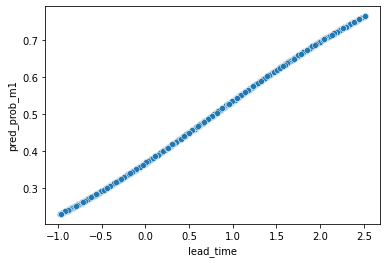

In [221]:
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_prob_m1')

## Aumentando o # de Variáveis

In [222]:
X_train = tb_train[['lead_time', 'adults']]
y_train = tb_train['is_cancelled']
m2 = LogisticRegression()
m2.fit(X_train, y_train)

LogisticRegression()

In [223]:
tb_train['pred_prob_m2'] = m2.predict_proba(X_train)[:,1]

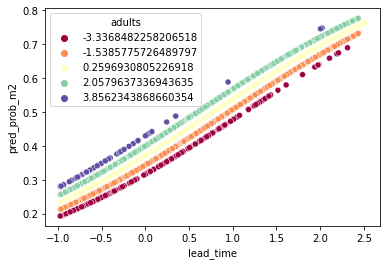

In [224]:
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_prob_m2', hue = 'adults', palette = 'Spectral');

In [225]:
tb_train.describe()

,lead_time,adults,children_imp,num_meal,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CN,country_grp_DEU,country_grp_ESP,...,country_grp_IRL,country_grp_ITA,country_grp_NLD,country_grp_Others,country_grp_PRT,country_grp_USA,is_company,is_cancelled,pred_prob_m1,pred_prob_m2
count,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,...,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000
mean,-0.083123,-0.005828,0.001803,-0.009401,0.019609,0.018612,0.014804,0.010389,0.058736,0.073643,...,0.029196,0.032590,0.018176,0.100339,0.404339,0.018130,0.058839,0.362025,0.362025,0.362025
std,0.863278,0.886970,0.992094,1.003455,0.138654,0.135149,0.120770,0.101398,0.235131,0.261191,...,0.168356,0.177563,0.133587,0.300454,0.490767,0.133422,0.235325,0.480589,0.136322,0.136813
min,-0.971606,-3.336848,-0.260392,-3.864457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229680,0.193238
25%,-0.812567,0.259693,-0.260392,-0.049886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249584,0.251317
50%,-0.354163,0.259693,-0.260392,-0.049886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313065,0.315799
75%,0.441029,0.259693,-0.260392,-0.049886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.440434,0.441908
max,2.508527,3.856234,4.757042,3.764686,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.765184,0.776784


#### Visualizando através de Simulações

In [226]:
adults_simul = list(np.linspace(tb_train['adults'].min(), 4, 100))
lead_time_simul = [0] * 100
tb_simul_adults = pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul_adults.head()

,lead_time,adults
0,0,-3.336848
1,0,-3.262739
2,0,-3.188629
3,0,-3.114519
4,0,-3.040410


In [227]:
tb_simul_adults['prob_cancelled'] = m2.predict_proba(tb_simul_adults[['lead_time', 'adults']])[:,1]

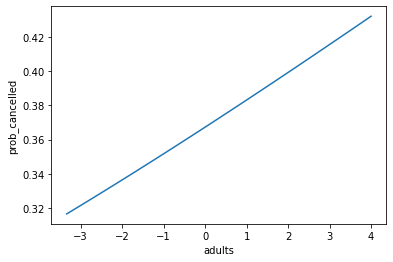

In [228]:
sns.lineplot(data = tb_simul_adults, x = 'adults', y = 'prob_cancelled');

In [229]:
lead_time_simul = list(np.linspace(tb_train['lead_time'].min(), 4, 100))
adults_simul = [0] * 100
tb_simul_lead_time= pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul_lead_time.head()
tb_simul_lead_time['prob_cancelled'] = m2.predict_proba(tb_simul_lead_time[['lead_time', 'adults']])[:,1]

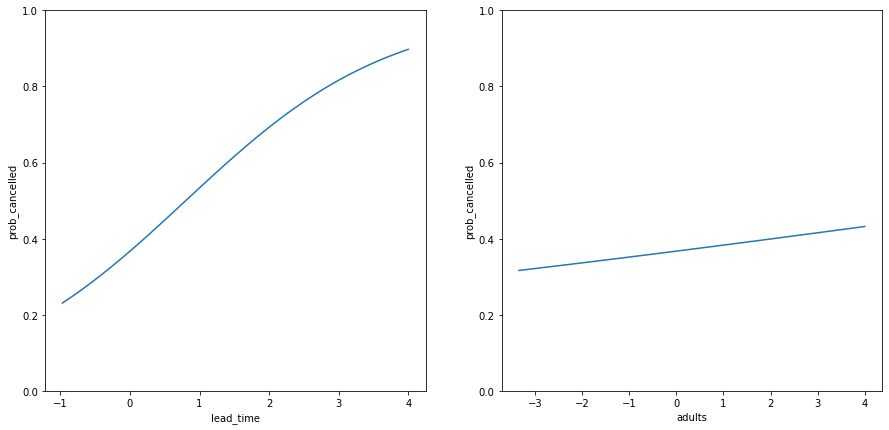

In [230]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.lineplot(data = tb_simul_lead_time, x = 'lead_time', y = 'prob_cancelled', ax = ax[0])
sns.lineplot(data = tb_simul_adults, x = 'adults', y = 'prob_cancelled', ax = ax[1])
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1);

In [231]:
lead_time_simul = list(np.linspace(tb_train['lead_time'].min(), 2, 100)) * 5
adults_simul = [-1] * 100 + [-0.5] * 100  + [0] * 100 + [0.5] * 100 + [1] * 100
tb_simul = pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul.head()

,lead_time,adults
0,-0.971606,-1.0
1,-0.941590,-1.0
2,-0.911573,-1.0
3,-0.881557,-1.0
4,-0.851541,-1.0


In [232]:
lead_time_simul = list(np.linspace(tb_train['lead_time'].min(), 2, 100)) * 5
adults_simul = [-1] * 100 + [-0.5] * 100  + [0] * 100 + [0.5] * 100 + [1] * 100
tb_simul = pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul.head()

,lead_time,adults
0,-0.971606,-1.0
1,-0.941590,-1.0
2,-0.911573,-1.0
3,-0.881557,-1.0
4,-0.851541,-1.0


In [233]:
tb_simul['prob_cancelled'] = m2.predict_proba(tb_simul[['lead_time', 'adults']])[:,1]

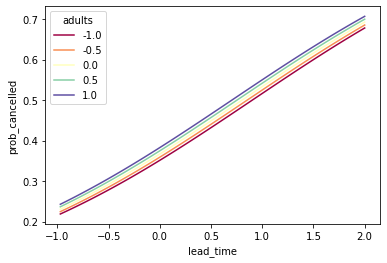

In [234]:
sns.lineplot(data = tb_simul, x = 'lead_time', y = 'prob_cancelled', hue = 'adults', palette='Spectral');

## *Thresholding* para Classificação

In [235]:
tb_train['pred_canc_m1'] = m1.predict(tb_train[['lead_time']])
tb_train[['is_cancelled', 'pred_canc_m1']]

,is_cancelled,pred_canc_m1
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
87199,1,0
87200,0,0
87201,0,0
87202,1,0


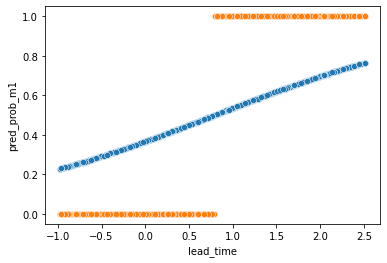

In [236]:
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_prob_m1');
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_canc_m1');

### Visualizando a Superficie de Decisão

In [237]:
from mlxtend.plotting import plot_decision_regions

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

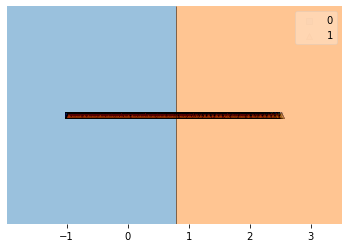

In [238]:
plot_decision_regions(np.array(tb_train[['lead_time']]), 
                      np.array(tb_train['is_cancelled']), 
                      m1, scatter_kwargs={'alpha':0.01})

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

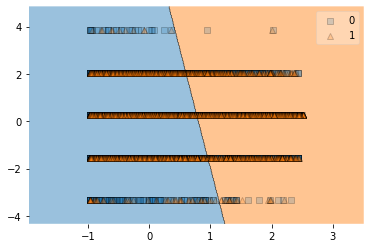

In [239]:
plot_decision_regions(np.array(tb_train[['lead_time', 'adults']]), 
                      np.array(tb_train['is_cancelled']), 
                      m2, scatter_kwargs={'alpha':0.2})

## Modelo Completo

In [210]:
tb_train.columns

Index(['lead_time', 'adults', 'children_imp', 'num_meal', 'country_grp_BEL',
       'country_grp_BRA', 'country_grp_CHE', 'country_grp_CN',
       'country_grp_DEU', 'country_grp_ESP', 'country_grp_FRA',
       'country_grp_GBR', 'country_grp_IRL', 'country_grp_ITA',
       'country_grp_NLD', 'country_grp_Others', 'country_grp_PRT',
       'country_grp_USA', 'is_company', 'is_cancelled', 'pred_prob_m1',
       'pred_prob_m2', 'pred_canc_m1'],
      dtype='object')

In [252]:
X_train = tb_train.drop(['is_cancelled', 'pred_prob_m1', 'pred_prob_m2', 'pred_canc_m1'], axis = 1)
y_train = tb_train['is_cancelled']
X_test = tb_test.drop('is_cancelled', axis = 1)
y_test = tb_test['is_cancelled']

In [253]:
m3 = LogisticRegression()
m3.fit(X_train, y_train)

LogisticRegression()

In [254]:
import shap

In [255]:
explainer = shap.explainers.Linear(m3, X_train)

In [265]:
shap_values = explainer(X_train)

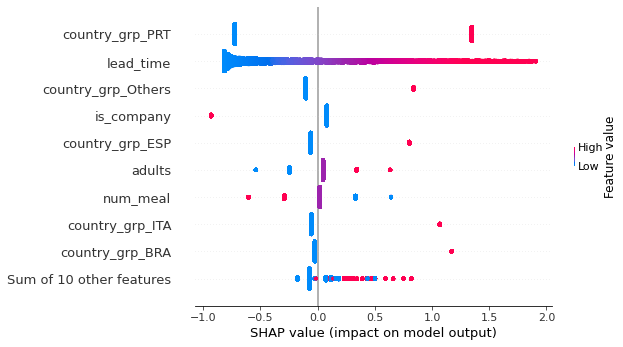

In [267]:
shap.plots.beeswarm(shap_values)